# How to use IndividualConditionalExpectation class

## 0. Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

from eml.marginal.ice import IndividualConditionalExpectation
%matplotlib inline

## 1. Load dataset

In [2]:
iris = load_iris()

## 2. Train model

In [3]:
estimator = RandomForestClassifier(n_estimators=100)
estimator.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 3. Compute partial dependence

In [4]:
ice = IndividualConditionalExpectation()
ice.fit(estimator)
x, y = ice.interpret(iris.data, feature=3, how='quantile')

## 4. Display the results

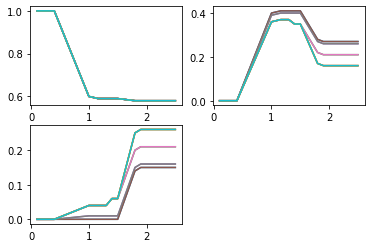

In [5]:
def plot_ice(x, y):
    if len(y.shape) == 2:
        y = y.reshape(y.shape + (1,))
    n_curves = y.shape[1]
    n_targets = y.shape[2]
    n_rows, n_columns = ((n_targets - 1) // 2) + 1, (n_targets > 1) * 2
    subplots = f'{n_rows:d}{n_columns:d}'
    for t in range(n_targets):
        plt.subplot(subplots + str(t + 1))
        for c in range(10):
            plt.plot(x, y[:, c, t])
    plt.show()


plot_ice(x, y)